In [28]:
%matplotlib inline
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

In [29]:
df = pd.read_csv('driverdemographics.csv')

In [30]:
df

,Crash_Year,Crash_Police_Region,Crash_Severity,Involving_Male_Driver,Involving_Female_Driver,Involving_Young_Driver_16-24,Involving_Senior_Driver_60plus,Involving_Provisional_Driver,Involving_Overseas_Licensed_Driver,Involving_Unlicensed_Driver,Count_Crashes,Count_Casualty_Fatality,Count_Casualty_Hospitalised,Count_Casualty_MedicallyTreated,Count_Casualty_MinorInjury,Count_Casualty_All
0,2001,Brisbane,Fatal,No,No,No,No,No,No,No,1,1,0,0,0,1
1,2001,Brisbane,Fatal,No,Yes,No,No,No,No,No,5,5,1,0,0,6
2,2001,Brisbane,Fatal,No,Yes,No,Yes,No,No,No,4,4,0,2,0,6
3,2001,Brisbane,Fatal,No,Yes,No,Yes,No,No,Yes,1,1,0,0,0,1
4,2001,Brisbane,Fatal,No,Yes,No,Yes,Yes,No,No,1,1,1,0,0,2
5,2001,Brisbane,Fatal,No,Yes,Yes,No,No,No,No,1,1,1,0,0,2
6,2001,Brisbane,Fatal,No,Yes,Yes,No,Yes,No,No,2,2,0,1,0,3
7,2001,Brisbane,Fatal,Yes,No,No,No,No,No,No,9,10,0,0,0,10
8,2001,Brisbane,Fatal,Yes,No,No,No,No,No,Yes,5,5,3,0,0,8
9,2001,Brisbane,Fatal,Yes,No,No,No,Yes,No,No,2,3,0,0,0,3


In [31]:
df[df==0].count()

Crash_Year                               0
Crash_Police_Region                      0
Crash_Severity                           0
Involving_Male_Driver                    0
Involving_Female_Driver                  0
Involving_Young_Driver_16-24             0
Involving_Senior_Driver_60plus           0
Involving_Provisional_Driver             0
Involving_Overseas_Licensed_Driver       0
Involving_Unlicensed_Driver              0
Count_Crashes                            0
Count_Casualty_Fatality               9996
Count_Casualty_Hospitalised           7772
Count_Casualty_MedicallyTreated       6864
Count_Casualty_MinorInjury            6394
Count_Casualty_All                    2475
dtype: int64

In [52]:
df.describe()

,Crash_Year,Involving_Male_Driver,Involving_Female_Driver,Involving_Young_Driver_16-24,Involving_Senior_Driver_60plus,Involving_Provisional_Driver,Involving_Overseas_Licensed_Driver,Involving_Unlicensed_Driver,Count_Crashes,Count_Casualty_Fatality,Count_Casualty_Hospitalised,Count_Casualty_MedicallyTreated,Count_Casualty_MinorInjury,Count_Casualty_All,Brisbane,Central,Northern,South Eastern,Southern,Unknown
count,11180.000000,11180.000000,11180.000000,11180.000000,11180.000000,11180.000000,11180.000000,11180.000000,11180.000000,11180.000000,11180.000000,11180.000000,11180.000000,11180.000000,11180.000000,11180.000000,11180.000000,11180.000000,11180.000000,11180.000000
mean,2006.377102,0.710555,0.605814,0.509213,0.343202,0.317710,0.171288,0.262075,22.853131,0.383721,7.249374,7.700268,4.702952,20.036315,0.212701,0.204562,0.181306,0.195796,0.183810,0.021825
std,3.521700,0.453525,0.488697,0.499937,0.474800,0.465607,0.376777,0.439783,47.511193,1.933315,28.676521,29.434842,16.569880,45.601295,0.409236,0.403399,0.385289,0.396830,0.387347,0.146117
min,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2006.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2009.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,21.000000,0.000000,1.000000,2.000000,2.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2015.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,485.000000,42.000000,465.000000,480.000000,318.000000,513.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [60]:
pd.get_dummies(df['Crash_Police_Region'])
df = df.replace('Yes',1)
df = df.replace('No',0)
df[['Brisbane','Central','Northern','South Eastern','Southern','Unknown']] = pd.get_dummies(df['Crash_Police_Region'])
df['Const'] = sm.add_constant(df.Brisbane)['const']

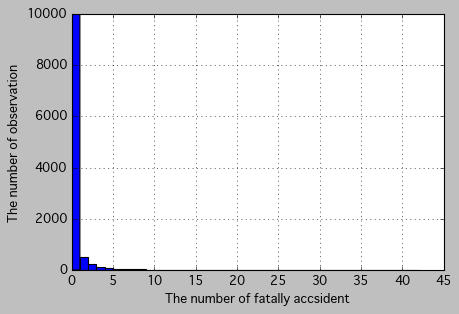

In [61]:
fig,ax = plt.subplots(1,1)
df['Count_Casualty_Fatality'].hist(bins=df['Count_Casualty_Fatality'].max())
ax.set_xlabel('The number of fatally accsident')
ax.set_ylabel('The number of observation')

In [62]:
fam = sm.families.Poisson()
y = df['Count_Casualty_Fatality']
X = df[['Crash_Year','Involving_Male_Driver',
                                                        'Involving_Female_Driver',
                                                        'Involving_Young_Driver_16-24',
                                                       'Involving_Senior_Driver_60plus',
                                                       'Involving_Provisional_Driver',
                                                       'Involving_Overseas_Licensed_Driver',
                                                       'Involving_Unlicensed_Driver',
                                                        'Brisbane',
                                                     'Central',
                                                     'Northern',
                                                     'South Eastern',
                                                     'Southern',
                                                     'Unknown',
                                                     'Const']]
model1 = sm.GLM(y,X,family=fam)
result1 = model1.fit()
print(result1.summary())

                    Generalized Linear Model Regression Results                    
Dep. Variable:     Count_Casualty_Fatality   No. Observations:                11180
Model:                                 GLM   Df Residuals:                    11166
Model Family:                      Poisson   Df Model:                           13
Link Function:                         log   Scale:                             1.0
Method:                               IRLS   Log-Likelihood:                -10002.
Date:                     Tue, 06 Dec 2016   Deviance:                       16750.
Time:                             08:27:37   Pearson chi2:                 3.85e+04
No. Iterations:                         10                                         
                                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Crash_Year                            

In [63]:
print('aic: ',result1.aic)
print('bic: ',result1.bic)

aic:  20031.3491438
bic:  -87337.7581945


In [64]:
print(result1.mu[0],np.exp((result1.params.values*X.ix[0].values).sum()))

0.557959236738 0.557959236738


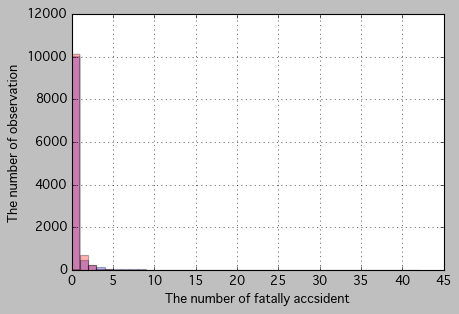

In [65]:
fig,ax = plt.subplots(1,1)
df['Count_Casualty_Fatality'].hist(bins = max(df['Count_Casualty_Fatality']),alpha=0.3)
dfbuf = pd.DataFrame()
dfbuf['mu'] = result1.mu
dfbuf['mu'].hist(color='r',alpha=0.3,bins=max(df['Count_Casualty_Fatality']),range=(0,max(df['Count_Casualty_Fatality'])))
ax.set_xlabel('The number of fatally accsident')
ax.set_ylabel('The number of observation')

In [66]:
print(result1.mu.mean())
print(result1.mu.var())
print(df['Count_Casualty_Fatality'].values.mean())
print(df['Count_Casualty_Fatality'].values.var())

0.383721295691
0.410290628374
0.383720930233
3.73737363232


In [67]:
fam = sm.families.NegativeBinomial()
y = df['Count_Casualty_Fatality']
X = df[['Crash_Year','Involving_Male_Driver',
                                                        'Involving_Female_Driver',
                                                        'Involving_Young_Driver_16-24',
                                                       'Involving_Senior_Driver_60plus',
                                                       'Involving_Provisional_Driver',
                                                       'Involving_Overseas_Licensed_Driver',
                                                       'Involving_Unlicensed_Driver',
                                                        'Brisbane',
                                                     'Central',
                                                     'Northern',
                                                     'South Eastern',
                                                     'Southern',
                                                     'Unknown',
                                                     'Const']]
model2 = sm.GLM(y,X,family=fam)
result2 = model2.fit()
print(result2.summary())

                    Generalized Linear Model Regression Results                    
Dep. Variable:     Count_Casualty_Fatality   No. Observations:                11180
Model:                                 GLM   Df Residuals:                    11166
Model Family:             NegativeBinomial   Df Model:                           13
Link Function:                         log   Scale:                   2.12610490609
Method:                               IRLS   Log-Likelihood:                -6875.4
Date:                     Tue, 06 Dec 2016   Deviance:                       8889.9
Time:                             08:28:10   Pearson chi2:                 2.37e+04
No. Iterations:                         26                                         
                                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Crash_Year                            

In [68]:
print('aic: ',result2.aic)
print('bic: ',result2.bic)

aic:  13778.8669159
bic:  -95198.2725437


In [69]:
print(result2.mu.mean())
print(result2.mu.var())
print(df['Count_Casualty_Fatality'].values.mean())
print(df['Count_Casualty_Fatality'].values.var())

0.37460139991
0.340182808113
0.383720930233
3.73737363232


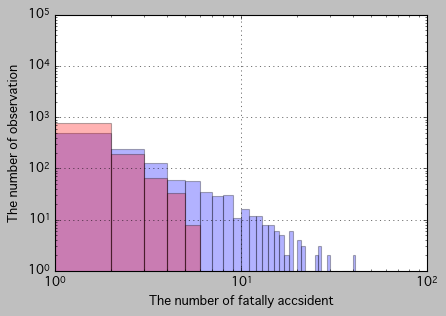

In [71]:
fig,ax = plt.subplots(1,1)
df['Count_Casualty_Fatality'].hist(bins = max(df.Count_Casualty_Fatality),alpha=0.3)
dfbuf = pd.DataFrame()
dfbuf['mu'] = result2.mu
dfbuf['mu'].hist(color='r',alpha=0.3,bins=max(df.Count_Casualty_Fatality),range=(0,max(df.Count_Casualty_Fatality)))
ax.set_xlabel('The number of fatally accsident')
ax.set_ylabel('The number of observation')
ax.set_yscale('log')
ax.set_xscale('log')